In [36]:
import numpy as np
import matplotlib.pyplot as plt

home = '/home/chesteklab/predictions/20241001-154356/'

overall = np.load(home + 'latencies.npy')
dlc = np.load(home + 'dlcLatencies.npy')
grab = np.load(home + 'grabLatencies.npy')
put = np.load(home + 'putLatencies.npy')
fps = 40
time = np.arange(0, len(overall)) / fps

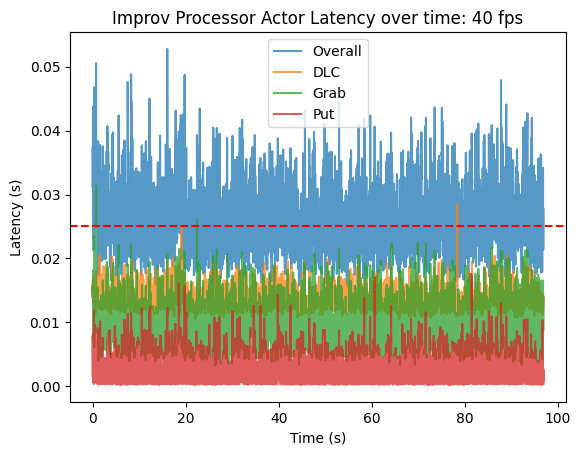

In [37]:
plt.plot(time, overall, label='Overall', alpha=0.75)
plt.plot(time, dlc, label='DLC', alpha=0.75)
plt.plot(time, grab, label='Grab', alpha=0.75)
plt.plot(time, put, label='Put', alpha=0.75)
plt.legend()
plt.ylabel('Latency (s)')
plt.xlabel('Time (s)')
plt.title(f'Improv Processor Actor Latency over time: {fps} fps')
plt.axhline(y=1/fps, color='r', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Delay over time: 40 fps, Avg Accumulated Delay: 0.28s')

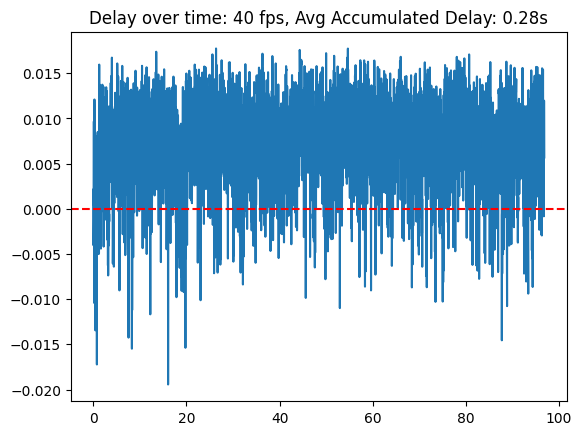

In [38]:
delay = (1/30-overall)
accumulated_delay = np.cumsum(delay)
plt.plot(time, delay, label='Delay')
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'Delay over time: {fps} fps, Avg Accumulated Delay: {accumulated_delay[-1]/time[-1]:.2f}s')